In [2]:
# Basics
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('mug.jpg',cv2.IMREAD_GRAYSCALE)
# cv2.imshow('image',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
# plt.plot([200,300,400],[100,200,300],'c', linewidth=5) # Draws a line
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
cv2.line(img,(0,0),(150,150),(255,255,255),15)
cv2.imshow("image",img)

In [10]:
# Video Capture
cap = cv2.VideoCapture(0)
 
while(True):
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
 
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [22]:
# Fonts and Shapes
img = cv2.imread('mug.jpg',cv2.IMREAD_COLOR)
cv2.line(img,(0,0),(150,150),(255,255,255),15)
cv2.rectangle(img,(15,25),(200,150),(0,0,255),15)
pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
cv2.polylines(img, [pts], True, (0,255,255), 3)
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'Hey!',(0,130), font, 1, (200,255,155), 2, cv2.LINE_AA)
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
# ROI
img[100:150,100:150] = [255,255,255]
cv2.imshow("image",img)
cv2.waitKey(0)

-1

In [35]:
# Creating the logo
img1 = cv2.imread('my picture.png')
img2 = cv2.imread('mug.jpg')
# Sizes must match
# weighted = cv2.addWeighted(img1, 0.6, img2, 0.4, 0)

rows,cols,channels = img2.shape
roi = img2[0:rows, 0:cols ]

img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 220, 255, cv2.THRESH_BINARY_INV)
mask_inv = cv2.bitwise_not(mask)

img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)

# cv2.imshow("ret", ret)
cv2.imshow("mask", img1_bg)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [38]:
# Masking images
cap = cv2.VideoCapture(0)
while(1):
    _, frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    lower_red = np.array([30,150,50])
    upper_red = np.array([255,255,180])
    
    mask = cv2.inRange(hsv, lower_red, upper_red)
    res = cv2.bitwise_and(frame,frame, mask= mask)
    
    bilateral = cv2.medianBlur(res,15)
    cv2.imshow('bilateral Blur',bilateral)

    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',bilateral)
    
    
    
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()
cap.release()

In [39]:
# Various image operations
cap = cv2.VideoCapture(0)

while(1):

    _, frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    lower_red = np.array([30,150,50])
    upper_red = np.array([255,255,180])
    
    mask = cv2.inRange(hsv, lower_red, upper_red)
    res = cv2.bitwise_and(frame,frame, mask= mask)

    kernel = np.ones((5,5),np.uint8)
    erosion = cv2.erode(mask,kernel,iterations = 1)
    dilation = cv2.dilate(mask,kernel,iterations = 1)

    cv2.imshow('Original',frame)
    cv2.imshow('Mask',mask)
    cv2.imshow('Erosion',erosion)
    cv2.imshow('Dilation',dilation)

    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()
cap.release()

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Morphology operations
cap = cv2.VideoCapture(1)

while(1):

    _, frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    lower_red = np.array([30,150,50])
    upper_red = np.array([255,255,180])
    
    mask = cv2.inRange(hsv, lower_red, upper_red)
    res = cv2.bitwise_and(frame,frame, mask= mask)

    kernel = np.ones((5,5),np.uint8)
    
    opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    cv2.imshow('Original',frame)
    cv2.imshow('Mask',mask)
    cv2.imshow('Opening',opening)
    cv2.imshow('Closing',closing)

    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()
cap.release()

In [6]:
# Sobel and Laplacian Gradients
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while(1):

    # Take each frame
    _, frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    lower_red = np.array([30,150,50])
    upper_red = np.array([255,255,180])
    
    mask = cv2.inRange(hsv, lower_red, upper_red)
    res = cv2.bitwise_and(frame,frame, mask= mask)

    laplacian = cv2.Laplacian(frame,cv2.CV_64F)
    sobelx = cv2.Sobel(frame,cv2.CV_64F,1,0,ksize=5)
    sobely = cv2.Sobel(frame,cv2.CV_64F,0,1,ksize=5)

    cv2.imshow('Original',frame)
    cv2.imshow('Mask',mask)
    cv2.imshow('laplacian',laplacian)
    cv2.imshow('sobelx',sobelx)
    cv2.imshow('sobely',sobely)

    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()
cap.release()

In [3]:
# Canny Edge Detection
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while(1):

    _, frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    lower_red = np.array([30,150,50])
    upper_red = np.array([255,255,180])
    
    mask = cv2.inRange(hsv, lower_red, upper_red)
    res = cv2.bitwise_and(frame,frame, mask= mask)

    cv2.imshow('Original',frame)
    edges = cv2.Canny(frame,100,200)
    cv2.imshow('Edges',edges)

    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()
cap.release()

In [4]:
# Matching Templates
img_rgb = cv2.imread('mug.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

template = cv2.imread('mug_copy.jpg',0)


In [5]:
w, h = template.shape[::-1]

In [6]:
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,255,255), 2)


cv2.imshow('Detected',img_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [1]:
# Corner Detection
img = cv2.imread('mug.jpg',cv2.IMREAD_GRAYSCALE)
img = np.float32(img)
corners = cv2.goodFeaturesToTrack(img, 100, 0.01, 10)
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(img,(int(x),int(y)),3,255,-1)
    
cv2.imshow('Corner',img)
cv2.waitKey(0)

NameError: name 'cv2' is not defined

In [17]:
# Feature Matching
import matplotlib.pyplot as plt

img1 = cv2.imread('mug.jpg',0)
img2 = cv2.imread('mug_copy.jpg',0)

# Detector used, from docs
orb = cv2.ORB_create()

# Keypoints and description
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

# Brute Force Matching
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1,des2)
# Sorting based on the euclidean distance 
matches = sorted(matches, key = lambda x:x.distance, reverse = True)

In [18]:
matches[2].distance

38.0

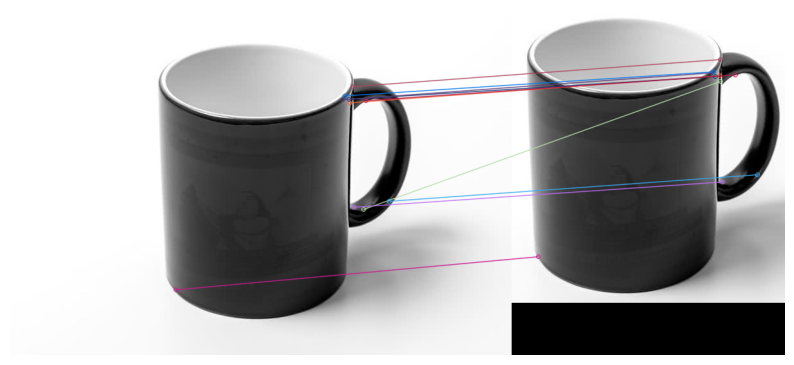

In [23]:
# Successful Matching
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10],None, flags=2)
plt.figure(figsize=(10,7))
plt.axis("off")
plt.imshow(img3)
plt.show()

In [2]:
# MOG Background Reduction
cap = cv2.VideoCapture('people-walking.mp4')
fogbg = cv2.createBackgroundSubtractorMOG2()

while True:
    ret, frame = cap.read()
    fgmask = fogbg.apply(frame)
    
    cv2.imshow('fgmask',frame)
    cv2.imshow('frame',fgmask)
    
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
        
cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-h4wtvo23\opencv\modules\highgui\src\window.cpp:376: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


In [ ]:
# Haar Cascades
import cv2

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

cap = cv2.VideoCapture(0)

while 1:
    ret, img = cap.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     Detect faces
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
#     Detect eye
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        
        eyes = eye_cascade.detectMultiScale(roi_gray)
#         Drawing the rectangle on the color image
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
            
        cv2.imshow("face", img)
        k = cv2.waitKey(30) & 0xff
        if k == 27:
            break

cap.release()
cv2.destroyAllWindows()